In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


In [2]:
raw_data = pd.read_csv("C:/Users/USER/Desktop/data scient sheet/UCI DATA SET/Bank Customer Churn Dataset/Bank Customer Churn Prediction.csv")
raw_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
raw_data.shape

(10000, 12)

In [4]:
# find missing value
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
raw_data.isnull(). sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
# NO missing value

# Visualizatin and Clean data

In [7]:
# Clean data , and drop unuse column
# we find  have a  3 contry on this data
raw_data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
#pd.set_option('display.max_columns', None)  use for show all columns but my notebook is heavy load
#pd.set_option('display.max_rows', None)
# 1 if the client has left the bank during some period or 0 if he/she has not.
raw_data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
raw_data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

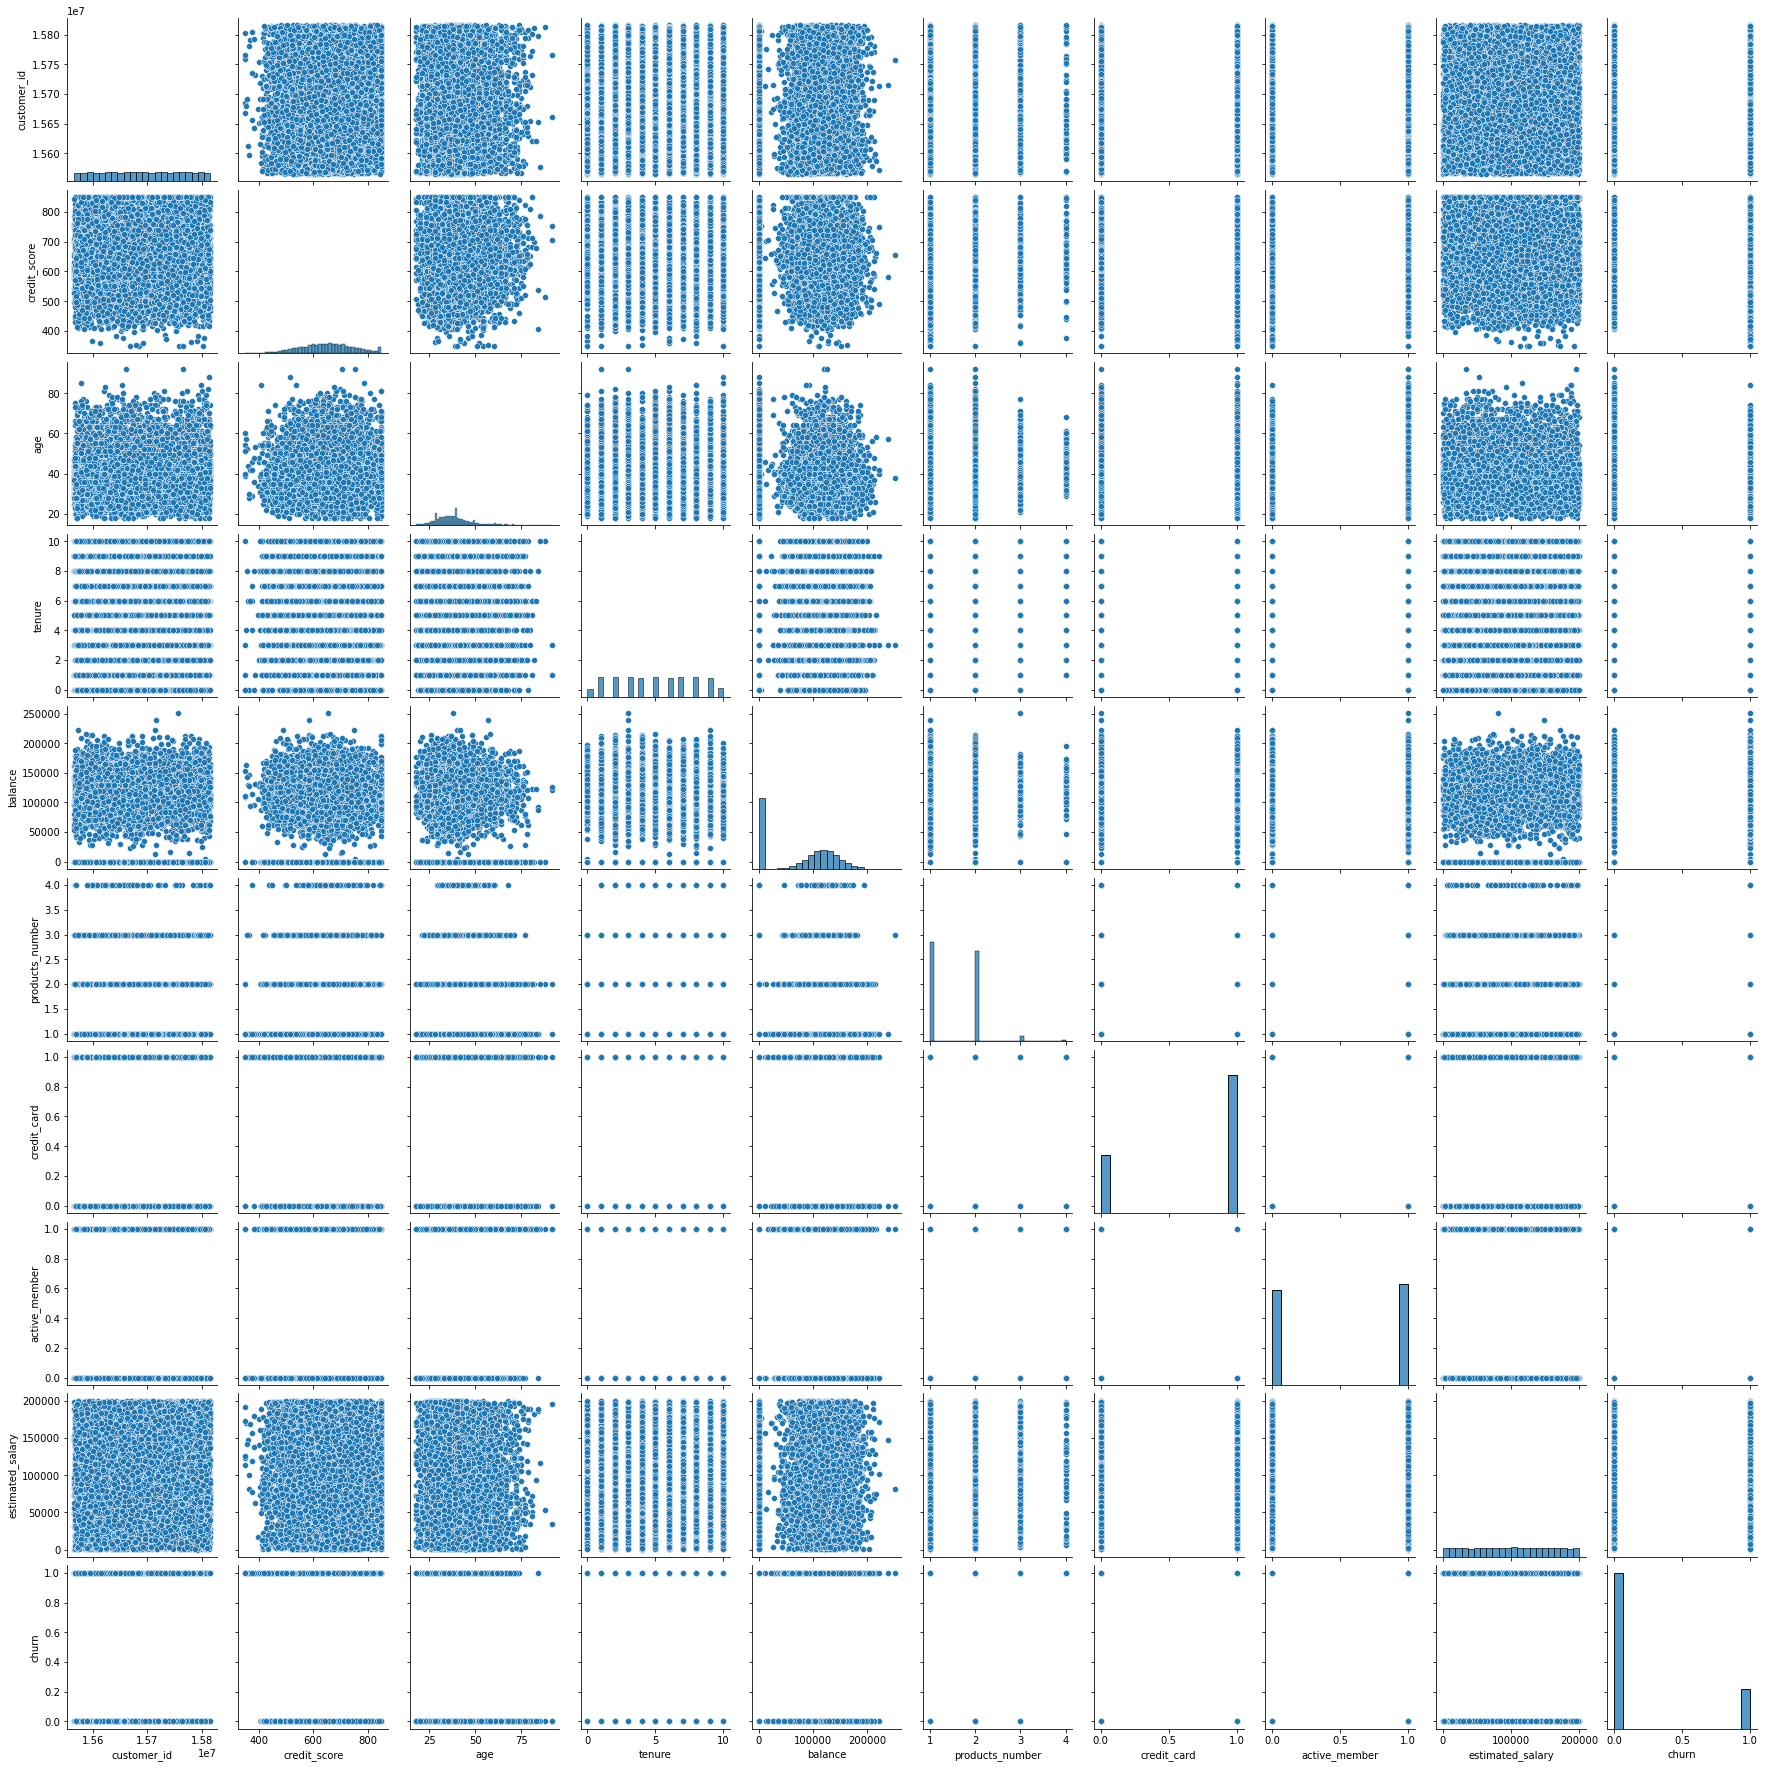

In [10]:
sns.pairplot(raw_data)

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='estimated_salary'>

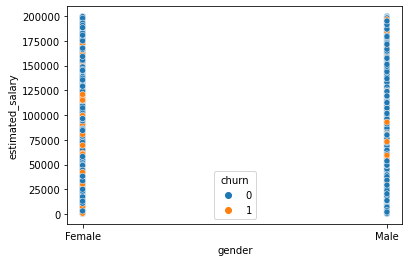

In [11]:
sns.scatterplot(raw_data["gender"], raw_data["estimated_salary"], hue=raw_data["churn"])
# we find all gender that salary over than 125000 is have a trend on no left bank
# and  female have a trend on left bank than male

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_score', ylabel='estimated_salary'>

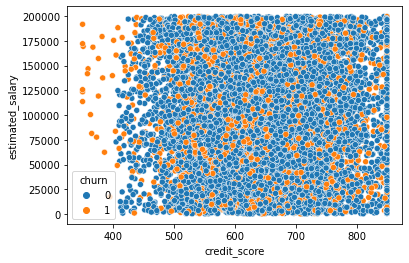

In [12]:
sns.scatterplot(raw_data["credit_score"], raw_data["estimated_salary"], hue=raw_data["churn"])
# we find group of low credit score < 400 is have a trend on left no matter problem about salary

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='estimated_salary'>

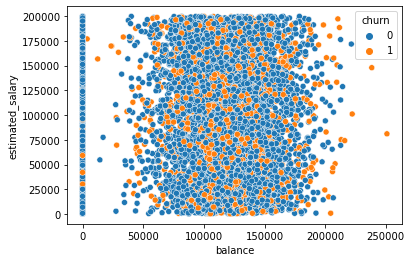

In [13]:
sns.scatterplot(raw_data["balance"], raw_data["estimated_salary"], hue=raw_data["churn"])

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

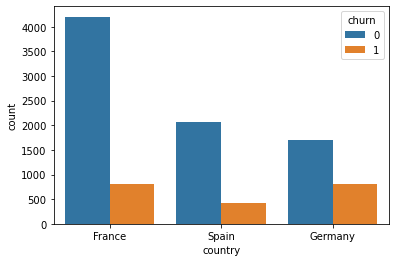

In [14]:
sns.countplot(raw_data["country"], hue=raw_data["churn"])
# Germany is have the most churn coustomer when compare about no churn customer

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='count'>

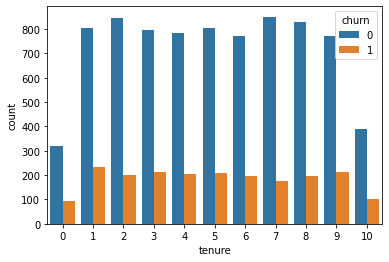

In [15]:
sns.countplot(raw_data["tenure"], hue=raw_data["churn"])

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_card', ylabel='products_number'>

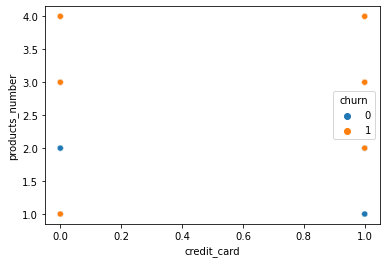

In [16]:
sns.scatterplot(raw_data["credit_card"], raw_data["products_number"], hue=raw_data["churn"])
# we find group has credit card is no churn

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_member', ylabel='credit_card'>

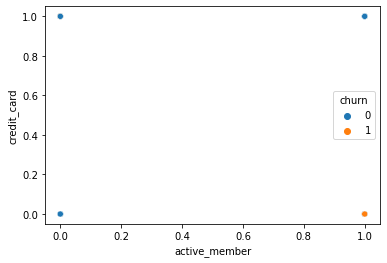

In [17]:
sns.scatterplot(raw_data["active_member"], raw_data["credit_card"], hue=raw_data["churn"])
# group that have active number can churn but if they have credit card they no churn

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_member', ylabel='products_number'>

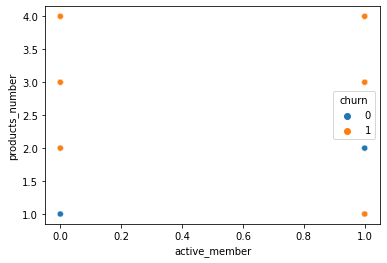

In [18]:
sns.scatterplot(raw_data["active_member"], raw_data["products_number"], hue=raw_data["churn"])
# can't analysis clear point.

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_score', ylabel='age'>

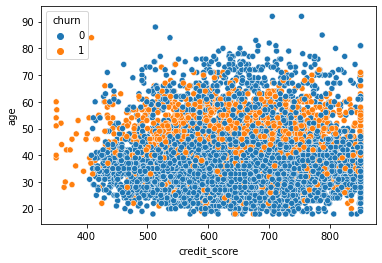

In [19]:
sns.scatterplot(raw_data["credit_score"], raw_data["age"], hue=raw_data["churn"])

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='estimated_salary'>

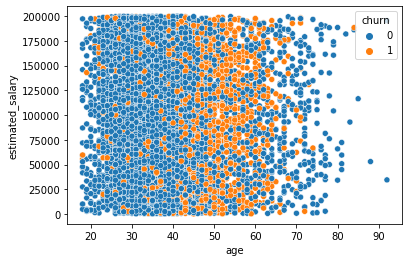

In [20]:
sns.scatterplot(raw_data["age"], raw_data["estimated_salary"], hue=raw_data["churn"])
# find the group age between 40-75 years are the most be churn customer

D:\ANACONDA3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='gender'>

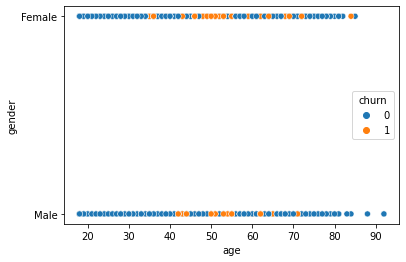

In [21]:
sns.scatterplot(raw_data["age"], raw_data["gender"], hue=raw_data["churn"])
# find the group age between 40-75 years are the most be churn customer and be female more male a little bit
# churn is cutomer not use service at the moment.

0    7963
1    2037
Name: churn, dtype: int64


<AxesSubplot:ylabel='churn'>

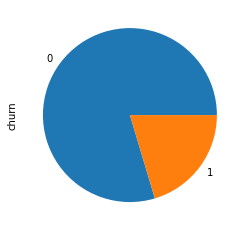

In [22]:
print(raw_data['churn'].value_counts())
raw_data['churn'].value_counts().plot.pie()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64


<AxesSubplot:ylabel='country'>

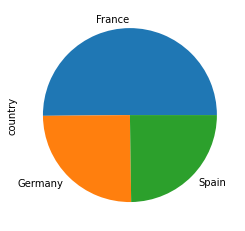

In [23]:
# find group numer of country group
print(raw_data['country'].value_counts())
raw_data['country'].value_counts().plot.pie()


In [24]:
# find churn %
churned_french = raw_data.churn[(raw_data.country == 'France') & (raw_data.churn == 1)].count()
count_french = raw_data.churn[raw_data.country == 'France'].count()
print("Percent of French People Who Churned --->", churned_french*100/count_french,'%')

churned_german = raw_data.churn[(raw_data.country == 'Germany') & (raw_data.churn == 1)].count()
count_german = raw_data.churn[(raw_data.country == 'Germany')].count()
print("Percent of German People Who Churned --->", churned_german*100/count_german,"%")

churned_spain = raw_data.churn[(raw_data.country == 'Spain') & (raw_data.churn == 1)].count()
count_spain = raw_data.churn[(raw_data.country == 'Spain')].count()
print("Percent of Spanish People Who Churned --->", churned_spain*100/count_spain,"%")

Percent of French People Who Churned ---> 16.15476665337056 %
Percent of German People Who Churned ---> 32.44320446392985 %
Percent of Spanish People Who Churned ---> 16.67339523617279 %


In [25]:
raw_data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [26]:
da = pd.get_dummies(raw_data['country'])
da

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [27]:
# get dummie and drop not use columns
# male is 1 female is 0
data_drop  = raw_data.drop(['customer_id', 'products_number', 'country'], axis=1)

In [28]:
data_dummies = pd.get_dummies(data_drop, drop_first=True)
data_dummies.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,gender_Male
0,619,42,2,0.00,1,1,101348.88,1,0
1,608,41,1,83807.86,0,1,112542.58,0,0
2,502,42,8,159660.80,1,0,113931.57,1,0
3,699,39,1,0.00,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0


In [29]:
# combinde data frame
data_clean = pd.concat([data_dummies, da], axis='columns')
data_clean

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,gender_Male,France,Germany,Spain
0,619,42,2,0.00,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,1,0,96270.64,0,1,1,0,0
9996,516,35,10,57369.61,1,1,101699.77,0,1,1,0,0
9997,709,36,7,0.00,0,1,42085.58,1,0,1,0,0
9998,772,42,3,75075.31,1,0,92888.52,1,1,0,1,0


In [30]:
data_clean.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'credit_card',
       'active_member', 'estimated_salary', 'churn', 'gender_Male', 'France',
       'Germany', 'Spain'],
      dtype='object')

# Splitting training and testing

In [31]:
X = data_clean.drop("churn", axis=1).values
y = data_clean["churn"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [32]:
# tranform by Scalar feature scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evalueting Model

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

# Logistic regression

In [35]:
# use  evaluate_model_performance(y_test, y_pred) if want to show metric
from sklearn.linear_model import LogisticRegression
modelLO = LogisticRegression()
modelLO.fit(X_train, y_train)
y_pred = modelLO.predict(X_test)
# Calculate Model accuracy by comparing y_test and y_pred 
acc_lo = accuracy_score(y_test, y_pred)
print( 'Accuracy of Logistic regresstion: ', acc_lo )

Accuracy of Logistic regresstion:  0.7825


# Decision Tree Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)
y_pred = modelDTC.predict(X_test)
acc_DTC = accuracy_score(y_test, y_pred)
print( 'Accuracy of Decision Tree Classification: ', acc_DTC )

Accuracy of Decision Tree Classification:  0.7395


# Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train, y_train)
y_pred = modelRFC.predict(X_test)
acc_RFC = accuracy_score(y_test, y_pred)
print( 'Random Forest Classification: ', acc_RFC )

Random Forest Classification:  0.8315


# K-Nearest Neighbors Classifier

In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

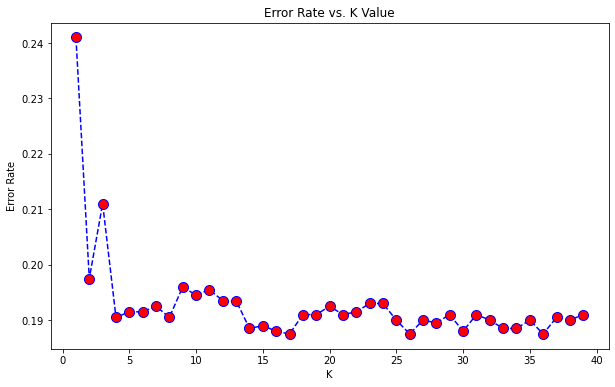

In [39]:
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
modelKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
modelKNN.fit(X_train_scaled, y_train)
y_pred = modelKNN.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred)
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  0.8085


In [41]:
Models = pd.DataFrame({
    'model': ['KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier', 'RandomForestClassifier' ],
    'Score': [acc_knn, acc_lo, acc_DTC, acc_RFC]})

Models.sort_values(by='Score', ascending=False)

,model,Score
3,RandomForestClassifier,0.8315
0,KNeighborsClassifier,0.8085
1,LogisticRegression,0.7825
2,DecisionTreeClassifier,0.7395


In [42]:
# RFC is the most efficency

# Test predict

In [43]:
Predict_PurchaseDTC =modelDTC.predict(data_clean.drop('churn', axis=1))
Predict_PurchaseDTC

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [44]:
Predict_PurchaseRFC =modelRFC.predict(data_clean.drop('churn', axis=1))
Predict_PurchaseRFC

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [45]:
Predict_PurchaseKNN =modelKNN.predict(data_clean.drop('churn', axis=1))
Predict_PurchaseKNN

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [46]:
Predict_PurchaseLO =modelLO.predict(data_clean.drop('churn', axis=1))
Predict_PurchaseLO

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# compare with another model with real value
raw_data['DTC'] = Predict_PurchaseDTC
raw_data['RFC'] = Predict_PurchaseRFC
raw_data['KNN'] = Predict_PurchaseKNN
raw_data['LO'] = Predict_PurchaseLO
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
raw_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,DTC,RFC,KNN,LO
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,1,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


In [48]:
A = (raw_data['churn'] != raw_data['DTC']). sum()
A

521

In [49]:
B = (raw_data['churn'] != raw_data['RFC']). sum()
B

337

In [50]:
C = (raw_data['churn'] != raw_data['KNN']). sum()
C

5267

In [51]:
D = (raw_data['churn'] != raw_data['LO']). sum()
D

2098

In [52]:
allvalue = raw_data.shape[0]
allvalue

10000

In [53]:
A_ = 100-(A/allvalue*100)
B_ = 100- (B/allvalue*100)
C_ = 100-(C/allvalue*100)
D_ =  100-(D/allvalue*100)


A_, B_, C_, D_

(94.79, 96.63, 47.330000000000005, 79.02000000000001)

In [ ]:
# use RFC with 96 % acurracy to predict

In [64]:
# Exsample predict only value
V =np.array([data_clean.drop('churn', axis=1).values])
S = V.reshape(-1, 11)
S

array([[619.,  42.,   2., ...,   1.,   0.,   0.],
       [608.,  41.,   1., ...,   0.,   0.,   1.],
       [502.,  42.,   8., ...,   1.,   0.,   0.],
       ...,
       [709.,  36.,   7., ...,   1.,   0.,   0.],
       [772.,  42.,   3., ...,   0.,   1.,   0.],
       [792.,  28.,   4., ...,   1.,   0.,   0.]])

In [75]:
data_clean.shape

(10000, 12)

In [67]:
data_clean.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,gender_Male,France,Germany,Spain
0,619,42,2,0.00,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,0,1


In [100]:
modelRFC.predict([[50, 40, 0, 0.00, 0, 0, 18000000, 0, 0, 1, 0]])

array([0], dtype=int64)